In [4]:
library(plyr)
library(tidyverse)
library(ggpubr)
library(plotly)
library(caret)
library(htmlwidgets)
source("utils/plot_theme.r")

In [2]:
enrichr_adj_pval_thresh = 0.05


In [3]:
geneSets_DF = read_delim(file = "data/omics_revamped_LLM_Enrichr_simVals_failure_refs_DF.tsv",
                         delim = "\t")

New names:
• `` -> `...1`
• `...1` -> `...2`
Rows: 300 Columns: 25
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (13): Source, GeneSetID, GeneSetName, GeneList, LLM Name, LLM Analysis, ...
dbl (10): ...1, ...2, Unnamed: 0, n_Genes, Score, Rank, P-value, Adjusted P-...
lgl  (2): LLM_success_TF, enrichr_success_TF

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
geneSets_DF$LLM_success_TF = as.factor(geneSets_DF$LLM_success_TF)

In [6]:
colnames(geneSets_DF)

[1] "...1"                 "...2"                 "Unnamed: 0"          
 [4] "Source"               "GeneSetID"            "GeneSetName"         
 [7] "GeneList"             "n_Genes"              "LLM Name"            
[10] "LLM Analysis"         "Score"                "Rank"                
[13] "Overlap"              "P-value"              "Adjusted P-value"    
[16] "Genes"                "Term"                 "GO term"             
[19] "GO ID"                "GO_term_genes"        "LLM_name_GO_term_sim"
[22] "enrichr_JI"           "LLM_success_TF"       "enrichr_success_TF"  
[25] "References"

In [7]:
JI_threshList = seq(0, 1, 0.05) #seq(0, 1, 0.01)

In [13]:
JI_thresh_eval_DF = data_frame(JI_thresh = JI_threshList, perc_success = NaN, accuracy = NaN, perc_meetsThresh = NaN)

In [14]:
for (JI_threshInd in c(1:length(JI_threshList))){
    JI_thresh = JI_threshList[JI_threshInd]
    
    JI_threshCol = ((geneSets_DF$`Adjusted P-value` <= enrichr_adj_pval_thresh) & (geneSets_DF$enrichr_JI >= JI_thresh)) 

    JI_thresh_eval_DF$perc_success[JI_threshInd] = sum(JI_threshCol)/nrow(geneSets_DF)
    
    JI_threshOnlyCol = (geneSets_DF$enrichr_JI >= JI_thresh) 

    JI_thresh_eval_DF$perc_meetsThresh[JI_threshInd] = 100*sum(JI_threshOnlyCol)/nrow(geneSets_DF)
    
    
    JI_threshCol = JI_threshCol %>% as.factor()
    
    c = confusionMatrix(JI_threshCol, geneSets_DF$LLM_success_TF)
    JI_thresh_eval_DF$accuracy[JI_threshInd] = c$overall["Accuracy"]
    
    }

Warning message in confusionMatrix.default(JI_threshCol, geneSets_DF$LLM_success_TF):
“Levels are not in the same order for reference and data. Refactoring data to match.”
Warning message in confusionMatrix.default(JI_threshCol, geneSets_DF$LLM_success_TF):
“Levels are not in the same order for reference and data. Refactoring data to match.”
Warning message in confusionMatrix.default(JI_threshCol, geneSets_DF$LLM_success_TF):
“Levels are not in the same order for reference and data. Refactoring data to match.”
Warning message in confusionMatrix.default(JI_threshCol, geneSets_DF$LLM_success_TF):
“Levels are not in the same order for reference and data. Refactoring data to match.”
Warning message in confusionMatrix.default(JI_threshCol, geneSets_DF$LLM_success_TF):
“Levels are not in the same order for reference and data. Refactoring data to match.”
Warning message in confusionMatrix.default(JI_threshCol, geneSets_DF$LLM_success_TF):
“Levels are not in the same order for reference and da

In [33]:
g2 = ggscatter(data = JI_thresh_eval_DF,
          x = "JI_thresh",
          y = "perc_meetsThresh", 
          xlab = "Required overlap with enriched GO terms",
        ylab = "Percentage of omics gene sets with required overlap with GO") +
geom_line()+
geom_vline(xintercept = 0.1, color = "red", linetype="dotted")+
theme_pubr()

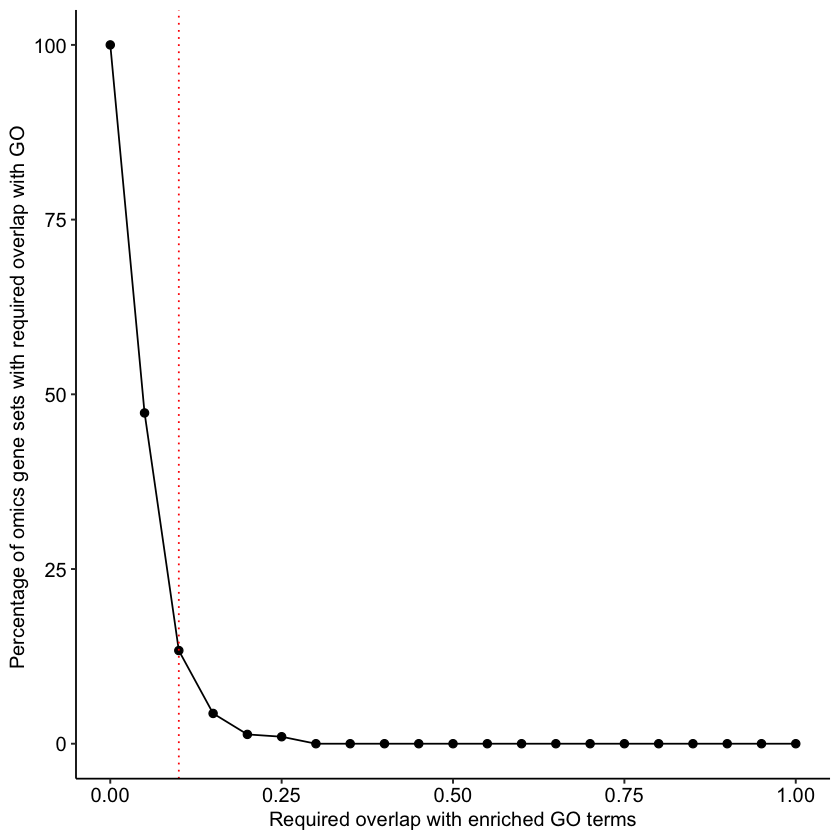

In [34]:
g2


In [35]:
ggsave(filename = "figures/OmicsRevamped_Enrichment_success_onlyThreshold.png", plot = g2,width = 5, height = 3)

In [36]:
ggsave(filename = "figures/OmicsRevamped_Enrichment_success_onlyThreshold.svg", plot = g2,width = 5, height = 3)

In [ ]:
g2 = ggscatter(data = JI_thresh_eval_DF,
          x = "JI_thresh",
          y = "perc_success", 
          xlab = "JI threshold",
        ylab = "% success") +
geom_vline(xintercept = 0.1, color = "red", linetype="dotted")+
theme_pubr()


In [ ]:
g2

In [ ]:
g2_plotly = ggplotly(g2)

In [ ]:
g2_plotly

In [ ]:
htmlwidgets::saveWidget(
                widget = g2_plotly, #the plotly object
                file = "figures/OmicsRevamped_Enrichment_success.html", #the path & file name
                selfcontained = TRUE #creates a single html file
                )

In [ ]:
geneSets_DF$enrichr_success_TF_0.1 = ((geneSets_DF$`Adjusted P-value` <= enrichr_adj_pval_thresh) & (geneSets_DF$enrichr_JI >= 0.1)) 

In [ ]:
write_delim(x = geneSets_DF, file = "data/omics_revamped_LLM_Enrichr_simVals_failure_refs_newThresh_DF.tsv" , 
            delim = "\t")

In [ ]:
table(geneSets_DF[, c("enrichr_success_TF_0.1", "LLM_success_TF")])

In [ ]:
table(geneSets_DF[, c("enrichr_success_TF_0.1", "Source")])

In [ ]:
geneSets_DF$enrichr_success_TF_0.03 = ((geneSets_DF$`Adjusted P-value` <= enrichr_adj_pval_thresh) & (geneSets_DF$enrichr_JI >= 0.03)) 

In [ ]:
geneSets_DF$enrichr_success_TF_0.06 = ((geneSets_DF$`Adjusted P-value` <= enrichr_adj_pval_thresh) & (geneSets_DF$enrichr_JI >= 0.06)) 

In [ ]:
table(geneSets_DF[, c("enrichr_success_TF_0.06", "LLM_success_TF")])

In [ ]:
51/(51+141)

In [ ]:
26/(26+141)

In [ ]:
table(geneSets_DF[, c("enrichr_success_TF_0.03", "LLM_success_TF")])

In [ ]:
table(geneSets_DF[, c("enrichr_success_TF", "LLM_success_TF")])

In [ ]:
94/(94+73)

In [ ]:
0.1